## **Business Problem**
Effective inventory and sales management are critical for optimizing profitability in the retail and wholesale industry. Companies need to ensure that they are not incurring losses due to inefficient pricing, poor inventory turnover, or vendor dependency. The goal of this analysis is to:
- Identify underperforming brands that require promotional or pricing adjustments.
- Determine top vendors contributing to sales and gross profit.
- Analyze the impact of bulk purchasing on unit costs.
- Assess inventory turnover to reduce holding costs and improve efficiency.

*Investigate the profitability variance between high-performing and low-performing vendors.*

In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
VendorSalesSummary = pd.read_csv("C:\Work folder\Projects\SalesSummary.csv")
VendorSalesSummary.head()

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\harsh\AppData\Local\Temp\ipykernel_2928\1444633360.py:1: SyntaxWarning: invalid escape sequence '\W'
  VendorSalesSummary = pd.read_csv("C:\Work folder\Projects\SalesSummary.csv")


,Unnamed: 0,brand,vendornumber,description,TotalSalesQuantity,TotalSalesDollars,TotalExcise,TotalPurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost
0,0,58,8320,Gekkeikan Black & Gold Sake,3446,43341.54,2715.12,9.28,7100.0,65888.0,3151.92
1,1,60,12546,Canadian Club 1858 VAP,1775,18716.25,1398.56,7.40,3266.0,24168.4,123880.97
2,2,61,8004,Margaritaville Silver,312,4364.88,245.70,10.60,624.0,6614.4,50293.62
3,3,62,1128,Herradura Silver Tequila,3125,119863.75,2463.18,28.67,6400.0,183488.0,68601.68
4,4,63,1128,Herradura Reposado Tequila,2778,112249.22,2190.45,30.46,5710.0,173926.6,68601.68


- #### Missing Values in percentages

In [70]:
round(VendorSalesSummary.isna().sum()/len(VendorSalesSummary)*100,2)

Unnamed: 0               0.00
brand                    0.00
vendornumber             0.00
description              0.00
TotalSalesQuantity       0.00
TotalSalesDollars        0.00
TotalExcise              0.00
TotalPurchasePrice       7.11
TotalPurchaseQuantity    6.72
TotalPurchaseDollars     6.72
TotalFreightCost         0.03
dtype: float64

In [71]:
# Remove rows with invalid purchase data
clean_df = VendorSalesSummary[
    (VendorSalesSummary['TotalPurchaseQuantity'] > 0) &
    (VendorSalesSummary['TotalPurchaseDollars'] > 0) &
    (VendorSalesSummary['TotalSalesDollars'] > 0)
]

clean_df.drop(columns='Unnamed: 0',inplace=True)

# Recalculate
clean_df['Gross_Profit'] = clean_df['TotalSalesDollars'] - clean_df['TotalPurchaseDollars']
clean_df['Profit_margin'] = (clean_df['Gross_Profit'] / clean_df['TotalSalesDollars'])*100
clean_df['StockTurnover']=clean_df['TotalSalesQuantity']/clean_df['TotalPurchaseQuantity']

C:\Users\harsh\AppData\Local\Temp\ipykernel_2928\2083513651.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(columns='Unnamed: 0',inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2928\2083513651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Gross_Profit'] = clean_df['TotalSalesDollars'] - clean_df['TotalPurchaseDollars']
C:\Users\harsh\AppData\Local\Temp\ipykernel_2928\2083513651.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

- ### Identify underperforming brands that require promotional or pricing adjustments.

In [72]:
low_treshold=clean_df['TotalSalesDollars'].quantile(0.1)
low_quantity=clean_df['TotalSalesQuantity'].quantile(0.25)

In [73]:
under_performing_prod = clean_df[((clean_df['TotalSalesDollars'] < low_treshold) & (clean_df['Profit_margin'] < 10)) | ((clean_df['TotalSalesQuantity'] < low_quantity) & (clean_df['Profit_margin'] > 30))]

In [74]:
under_performing_prod

,brand,vendornumber,description,TotalSalesQuantity,TotalSalesDollars,TotalExcise,TotalPurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,Gross_Profit,Profit_margin,StockTurnover
7,75,7245,Three Olives Tomato Vodka,21,314.79,16.53,10.94,20.0,218.80,38994.78,95.99,30.493345,1.050000
10,82,4425,Hundred Acre Ark Vy Cab Svgn,33,12374.67,3.70,248.34,18.0,4470.12,144929.24,7904.55,63.876855,1.833333
11,86,3960,Don Julio Real Tequila,18,5399.82,14.18,236.21,14.0,3306.94,257032.07,2092.88,38.758329,1.285714
30,122,12546,DeKuyper Mixed Berry Medley,23,252.77,18.15,7.96,2.0,15.92,123880.97,236.85,93.701784,11.500000
33,128,480,Grey Goose Le Citron Vodka,4,122.96,4.20,24.42,8.0,195.36,89286.27,-72.40,-58.880937,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11258,90080,1703,Ch Cantenac Brown Margaux 11,30,1799.70,3.37,40.26,16.0,644.16,172.00,1155.54,64.207368,1.875000
11262,90085,2,Ch Lilian 09 Ladouys St Este,18,665.82,2.00,23.86,16.0,381.76,27.08,284.06,42.663182,1.125000
11263,90086,1703,La Dame Montrose St Estep 11,27,1403.73,2.98,34.20,2.0,68.40,172.00,1335.33,95.127268,13.500000
11265,90088,1703,Ch Le Petite Mouton 12 Pauil,26,3509.74,2.89,92.46,12.0,1109.52,172.00,2400.22,68.387402,2.166667


In [75]:
under_performing_prod['Profit_margin'].min()

np.float64(-47561.277906081596)

C:\Users\harsh\AppData\Local\Temp\ipykernel_2928\1527835006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_performing_prod['Profit_Margin_Clipped'] = np.clip(under_performing_prod['Profit_margin'], -100, 100)


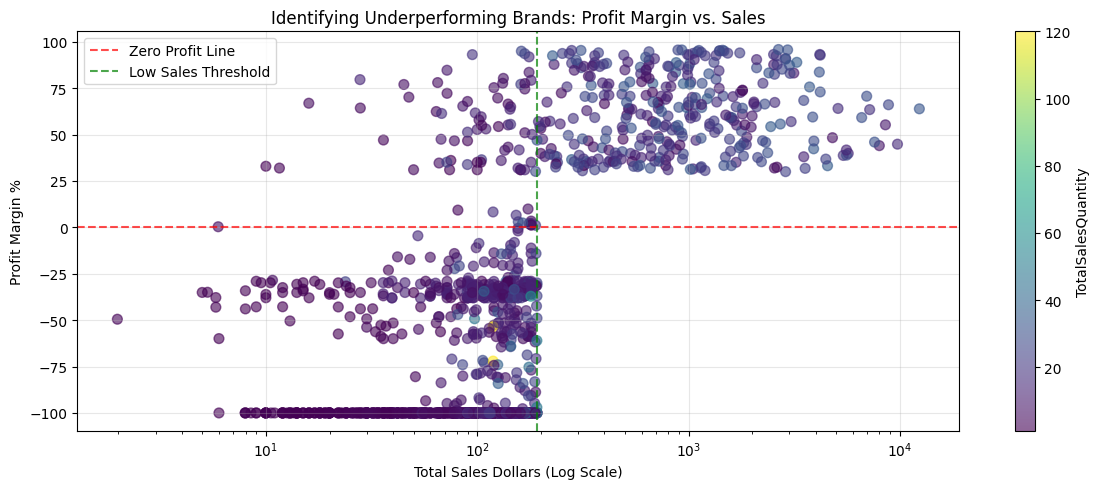

In [76]:
plt.figure(figsize=(12, 5))

under_performing_prod['Profit_Margin_Clipped'] = np.clip(under_performing_prod['Profit_margin'], -100, 100)

#Plotting under performing products
scatter = plt.scatter(under_performing_prod['TotalSalesDollars'],under_performing_prod['Profit_Margin_Clipped'],alpha=0.6,c=under_performing_prod['TotalSalesQuantity'],cmap='viridis',s=50) # Size of points

plt.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Zero Profit Line')
plt.axvline(x=low_treshold, color='g', linestyle='--', alpha=0.7, label='Low Sales Threshold')

plt.xscale('log')
plt.xlabel('Total Sales Dollars (Log Scale)')
plt.ylabel('Profit Margin %')
plt.title('Identifying Underperforming Brands: Profit Margin vs. Sales')

#StockTurnover color
cbar = plt.colorbar(scatter)
cbar.set_label('TotalSalesQuantity')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Insight Summary:**
- **Severe Loss Leaders:** A significant cluster of brands has high sales volume but catastrophically negative profit margins (as low as -100). These are the highest priority. 
   - **Action:** Immediately raise prices or renegotiate supplier costs.
- **Hidden Opportunities:** Another group shows very high profitability but low sales volume. 
   - Action: Launch targeted promotions to increase their sales.
- **Portfolio Weakness:** There is a stark absence of brands in the "Star" quadrant (high sales, high profit), indicating a fundamental pricing or cost issue across the entire assortment.

- ### Determine top vendors contributing to sales and gross profit.

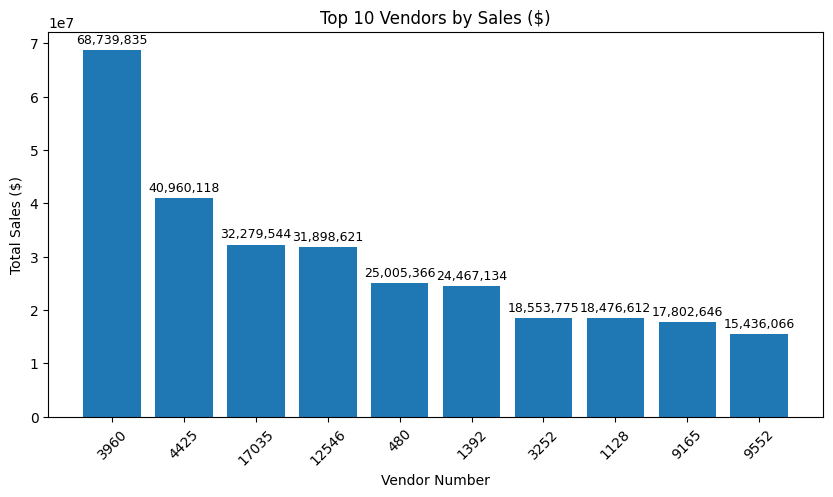

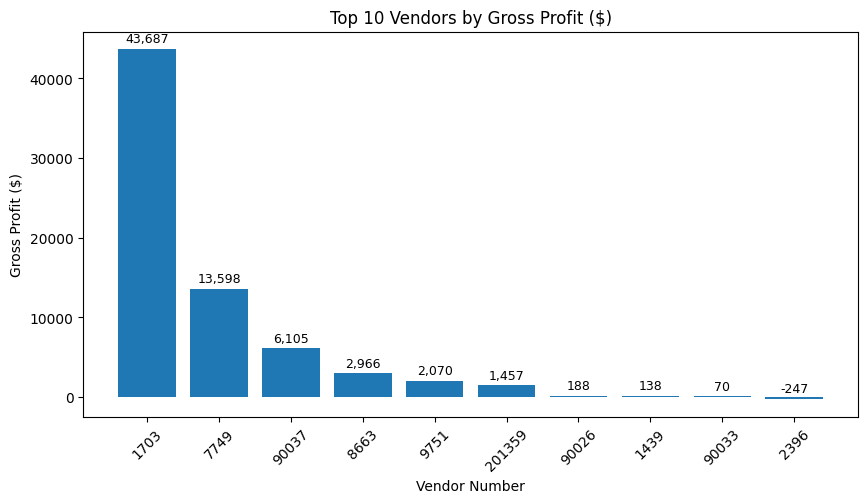

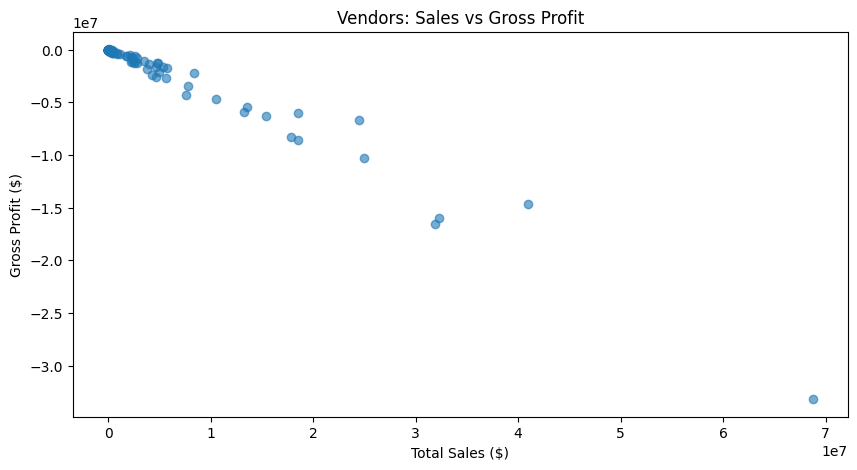

In [77]:
# Aggregate by vendor
vendor_summary = clean_df.groupby("vendornumber").agg({
    "TotalSalesDollars": "sum",
    "Gross_Profit": "sum"
}).reset_index()

# Sort vendors by sales and profit separately
top_sales = vendor_summary.sort_values("TotalSalesDollars", ascending=False).head(10)
top_profit = vendor_summary.sort_values("Gross_Profit", ascending=False).head(10)

# Re-plot with data labels outside bars

# Top Vendors by Sales with labels
plt.figure(figsize=(10,5))
bars = plt.bar(top_sales["vendornumber"].astype(str), top_sales["TotalSalesDollars"])
plt.title("Top 10 Vendors by Sales ($)")
plt.xlabel("Vendor Number")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)

# Add labels outside bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.01 * max(top_sales["TotalSalesDollars"])), 
             f"{yval:,.0f}", ha="center", va="bottom", fontsize=9)

plt.show()

# Top Vendors by Gross Profit with labels
plt.figure(figsize=(10,5))
bars = plt.bar(top_profit["vendornumber"].astype(str), top_profit["Gross_Profit"])
plt.title("Top 10 Vendors by Gross Profit ($)")
plt.xlabel("Vendor Number")
plt.ylabel("Gross Profit ($)")
plt.xticks(rotation=45)

# Add labels outside bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (0.01 * max(top_profit["Gross_Profit"])), 
             f"{yval:,.0f}", ha="center", va="bottom", fontsize=9)

plt.show()


# Scatter plot to show relationship between Sales and Profit for vendors
plt.figure(figsize=(10,5))
plt.scatter(vendor_summary["TotalSalesDollars"], vendor_summary["Gross_Profit"], alpha=0.6)
plt.title("Vendors: Sales vs Gross Profit")
plt.xlabel("Total Sales ($)")
plt.ylabel("Gross Profit ($)")
plt.show()


**Insights Summary:**
- High sales ≠ profitability: Top sales vendor (3960, $68.7M) is generating the largest losses.

- Profit is concentrated: Only a few vendors (e.g., 1703, $43.7K profit) generate positive returns, but amounts are small.

- Negative correlation: As sales rise, gross profit falls — indicating structural pricing/cost issues.

*Action: Reassess contracts with top sales vendors, prioritize mid-tier profitable vendors, and shift KPIs from sales volume → profit margin.*

- ### Analyze the impact of bulk purchasing on unit costs.

C:\Users\harsh\AppData\Local\Temp\ipykernel_2928\102583751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Unit_Purchase_Cost"] = clean_df["TotalPurchaseDollars"] / clean_df["TotalPurchaseQuantity"]
C:\Users\harsh\AppData\Local\Temp\ipykernel_2928\102583751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Unit_Sales_Price"] = clean_df["TotalSalesDollars"] / clean_df["TotalSalesQuantity"]


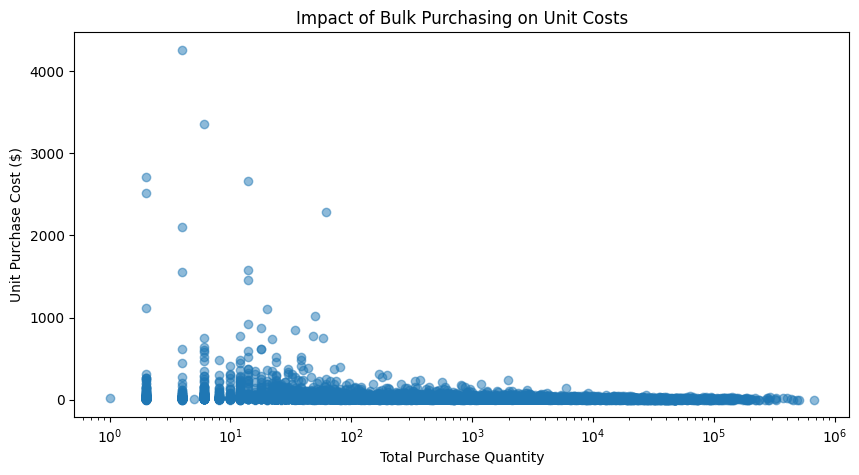

Correlation between Purchase Quantity and Unit Cost: -0.04


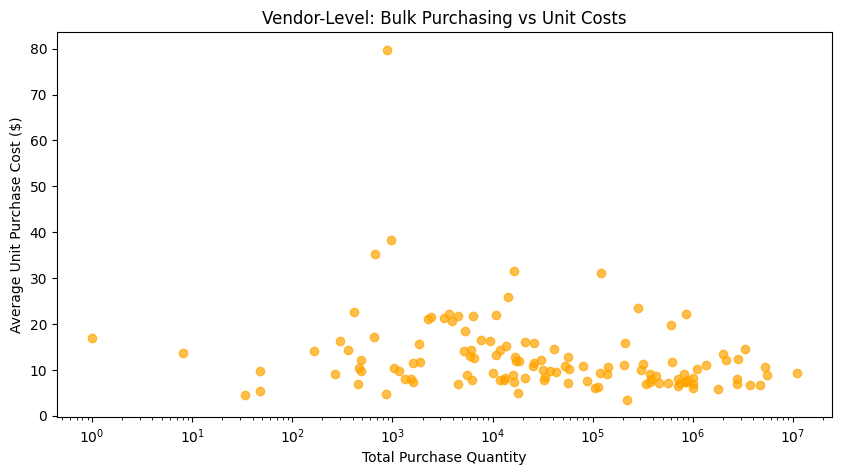

In [78]:

# Calculate unit costs and unit sales prices
clean_df["Unit_Purchase_Cost"] = clean_df["TotalPurchaseDollars"] / clean_df["TotalPurchaseQuantity"]
clean_df["Unit_Sales_Price"] = clean_df["TotalSalesDollars"] / clean_df["TotalSalesQuantity"]

# Scatter plot: Purchase Quantity vs Unit Purchase Cost
plt.figure(figsize=(10,5))
plt.scatter(clean_df["TotalPurchaseQuantity"], clean_df["Unit_Purchase_Cost"], alpha=0.5)
plt.title("Impact of Bulk Purchasing on Unit Costs")
plt.xlabel("Total Purchase Quantity")
plt.ylabel("Unit Purchase Cost ($)")
plt.xscale("log")  # log scale helps when quantities vary widely
plt.show()

# Correlation analysis
correlation = clean_df["TotalPurchaseQuantity"].corr(clean_df["Unit_Purchase_Cost"])
print(f"Correlation between Purchase Quantity and Unit Cost: {correlation:.2f}")

# Aggregate by vendor to see vendor-level effect
vendor_analysis = clean_df.groupby("vendornumber").agg({
    "TotalPurchaseQuantity": "sum",
    "TotalPurchaseDollars": "sum"
}).reset_index()

vendor_analysis["Unit_Purchase_Cost"] = vendor_analysis["TotalPurchaseDollars"] / vendor_analysis["TotalPurchaseQuantity"]

# Plot vendor-level trend
plt.figure(figsize=(10,5))
plt.scatter(vendor_analysis["TotalPurchaseQuantity"], vendor_analysis["Unit_Purchase_Cost"], color="orange", alpha=0.7)
plt.title("Vendor-Level: Bulk Purchasing vs Unit Costs")
plt.xlabel("Total Purchase Quantity")
plt.ylabel("Average Unit Purchase Cost ($)")
plt.xscale("log")
plt.show()


**Insights Summary:**
- Clear economies of scale: As purchase quantities increase, unit costs decline sharply.

- High variability at low volumes: Small purchases show wide cost fluctuations (some > $4000/unit).

- Stabilization at scale: Beyond ~1,000 units, costs flatten and remain consistently low.

*Action: Encourage bulk purchasing to secure lower, more predictable unit costs and avoid costly small-lot buys.*

- ### Assess inventory turnover to reduce holding costs and improve efficiency.

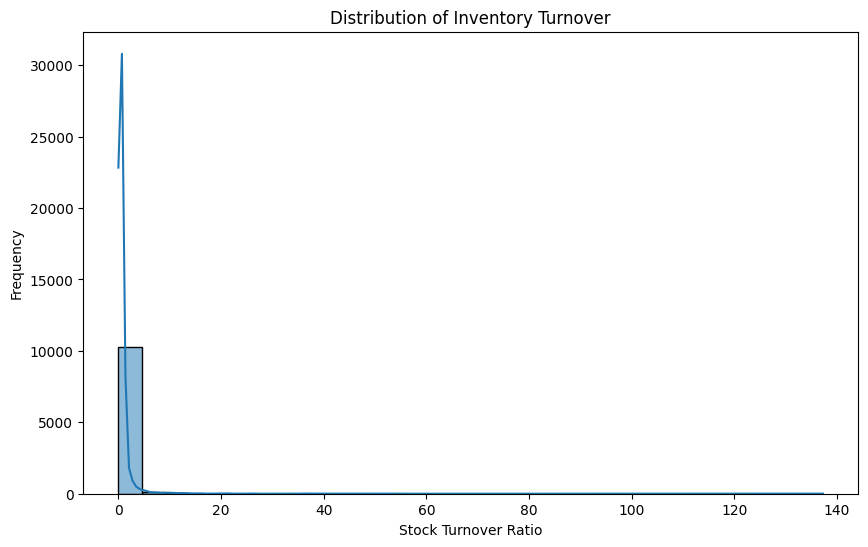

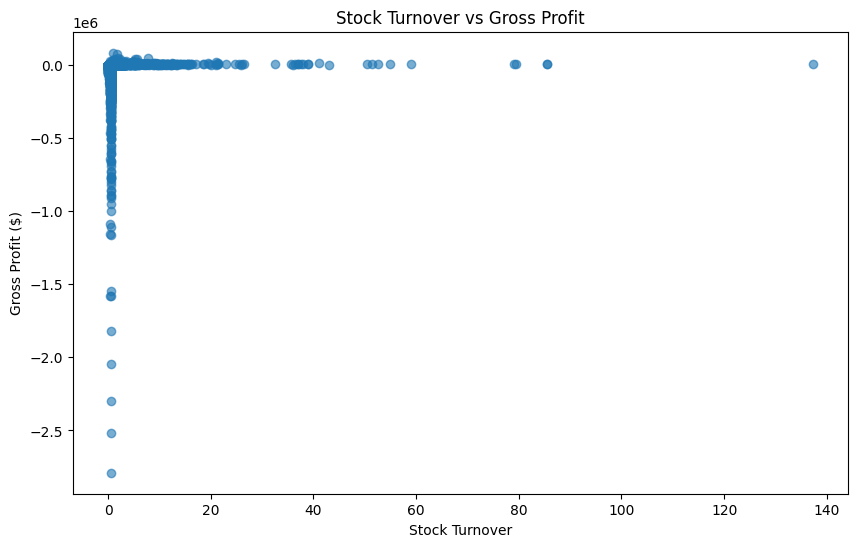

In [79]:

# Basic distribution of inventory turnover
plt.figure(figsize=(10,6))
sns.histplot(clean_df["StockTurnover"],bins=30,kde=True)
plt.title("Distribution of Inventory Turnover")
plt.xlabel("Stock Turnover Ratio")
plt.ylabel("Frequency")
plt.show()

# Vendor-level average stock turnover
vendor_turnover = clean_df.groupby("vendornumber")["StockTurnover"].mean().reset_index()

# Top and bottom vendors by turnover
top_vendors_turnover = vendor_turnover.sort_values("StockTurnover", ascending=False).head(10)
low_vendors_turnover = vendor_turnover.sort_values("StockTurnover", ascending=True).head(10)

# Scatter plot: Stock Turnover vs Gross Profit
plt.figure(figsize=(10,6))
plt.scatter(clean_df["StockTurnover"], clean_df["Gross_Profit"], alpha=0.6)
plt.title("Stock Turnover vs Gross Profit")
plt.xlabel("Stock Turnover")
plt.ylabel("Gross Profit ($)")
plt.show()


**Insights Summary:**
- There is a strong negative correlation between stock turnover and gross profit margin. High turnover (fast sales) comes with low margins. High margins come with low turnover (slow sales).

- Most Companies Are Slow-Moving: The vast majority of businesses have a very low stock turnover (between 0-20), indicating they prioritize higher profit margins per item over sales velocity.

- High Turnover is Rare: Extremely high turnover rates are uncommon outliers. This model is rare because it requires perfect operational efficiency to survive on razor-thin margins.

- ### Investigate the profitability variance between high-performing and low-performing vendors.

Average Profitability by Vendor Performance Level:
                 Gross_Profit  Profit_margin
Performance                                 
High-performing -5.692524e+06    -107.941846
Low-performing  -6.258057e+03    -244.300266
Mid-performing  -2.252440e+05     -90.818783


C:\Users\harsh\AppData\Local\Temp\ipykernel_2928\3862994394.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Performance", y="Profit_margin", data=vendor_perf, palette="Set2")


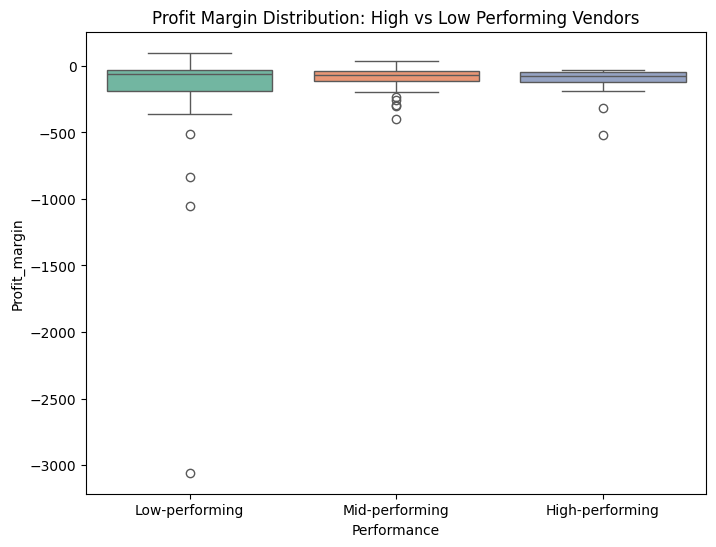

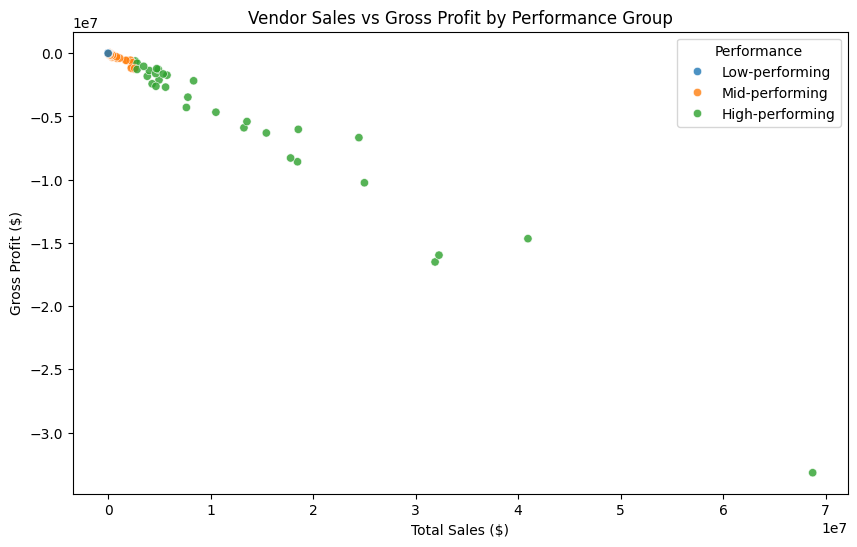

In [ ]:
# vendor metrics
vendor_perf = clean_df.groupby("vendornumber").agg({
    "TotalSalesDollars": "sum",
    "Gross_Profit": "sum",
    "Profit_margin": "mean"
}).reset_index()

# Classify vendors by Sales (quartiles)
q75 = vendor_perf["TotalSalesDollars"].quantile(0.75)
q25 = vendor_perf["TotalSalesDollars"].quantile(0.25)

def classify_vendor(sales):
    if sales >= q75:
        return "High-performing"
    elif sales <= q25:
        return "Low-performing"
    else:
        return "Mid-performing"

vendor_perf["Performance"] = vendor_perf["TotalSalesDollars"].apply(classify_vendor)

# --- Analysis ---
summary = vendor_perf.groupby("Performance")[["Gross_Profit", "Profit_margin"]].mean()
print("Average Profitability by Vendor Performance Level:")
print(summary)

# --- Boxplot of Profit Margins ---
plt.figure(figsize=(8,6))
sns.boxplot(x="Performance", y="Profit_margin", data=vendor_perf, palette="Set2")
plt.title("Profit Margin Distribution: High vs Low Performing Vendors")


# ---  Sales vs Gross Profit ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=vendor_perf, x="TotalSalesDollars", y="Gross_Profit", hue="Performance", alpha=0.8)
plt.title("Vendor Sales vs Gross Profit by Performance Group")
plt.xlabel("Total Sales ($)")
plt.ylabel("Gross Profit ($)")
plt.show()


**Insights Summary:**
- low-performing vendors have a massive range of negative profit margins, some as low as -$1000 to -$1100. This indicates severe financial distress, where their cost of goods sold far exceeds their sales revenue.

- higher sales volume strongly correlates with higher gross profit (both in dollars and percentage). High-performing vendors dominate in both metrics.

- Mid-performing vendors are stuck in the middle. They achieve moderate sales but their gross profit % is significantly closer to the low performers than the high performers, suggesting inefficiency and poor margin control despite decent sales.